## Final Project Submission

Please fill out:
* Student name: Joe Guy
* Student pace:  part time 
* Scheduled project review date/time: 03/08/19 3pm
* Instructor name: Joe San Pietro
* Blog post URL:


## Importing programs and files

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [193]:
df = pd.read_csv("kc_house_data.csv")

## Scrubbing the dataset

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [195]:
df = df.drop(['id'], axis=1) #ID is not useful to us it is an index
df = df.drop(['date'], axis=1) # not using datetime trending in this model

There are missing values in waterfront, view, yr_renovated.  

In [196]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [197]:
df.dropna(subset=['view'], inplace=True) #remove rows containing nulls in the view column

There are too many nulls in waterfront and yr_renovated.  Will bin out the nulls.  

Looking at datatypes, sqft_basement is an object, 

In [198]:
df.sqft_basement.value_counts() #listed with an object datatype

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
450.0       103
530.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
910.0        71
          ...  
875.0         1
3260.0        1
1913.0        1
172.0         1
915.0         1
248.0         1
2730.0        1
2810.0        1
1024.0        1
2190.0        1
3480.0        1
768.0         1
243.0         1
274.0         1
2400.0        1
652.0         1
1920.0        1
207.0         1
1840.0        1
143.0         1
276.0         1
417.0         1
2580.0        1
2120.0        1
556.0         1
2600.0        1
65.0          1
3500.0        1
1960.0        1
704.0         1
Name: sqft_basement, Len

In [199]:
df = df[df.sqft_basement != '?'] #remove '?' from the sqft_basement column

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       18749 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null object
yr_built         21082 non-null int64
yr_renovated     17340 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.2+ MB


In [201]:
df.waterfront.value_counts() #waterfront is a categorical column, 0 = not on the waterfront, 1 = on the waterfront.  

0.0    18608
1.0      141
Name: waterfront, dtype: int64

In [202]:
df.waterfront=df.waterfront.fillna(2) #filling the nulls with 2. This bin will represent data that will be dropped.

In [203]:
df.waterfront.value_counts()

0.0    18608
2.0     2333
1.0      141
Name: waterfront, dtype: int64

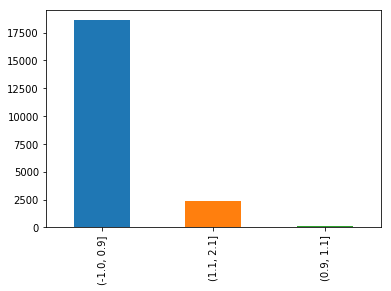

In [204]:
bins_waterfront = [-1, .9, 1.1, 2.1]
# use pd.cut
bins_waterfront = pd.cut(df['waterfront'], bins_waterfront)
bins_waterfront = bins_waterfront.cat.as_unordered()
bins_waterfront.value_counts().plot(kind='bar')

In [205]:
df["waterfront"]=bins_waterfront

In [206]:
df.yr_renovated.value_counts() #There are many more properties that have not been renovated; not renovated = 0. 

0.0       16618
2014.0       69
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       18
2002.0       17
1998.0       15
1999.0       15
2008.0       15
1983.0       15
1984.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1991.0       14
2010.0       14
1992.0       13
1994.0       13
2001.0       12
1997.0       12
1996.0       11
1995.0       11
          ...  
1968.0        6
1964.0        5
1975.0        5
1973.0        4
1965.0        4
1981.0        4
1969.0        4
1978.0        3
1963.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1972.0        3
1945.0        2
1962.0        2
1967.0        2
1974.0        2
1957.0        2
1940.0        2
1951.0        1
1948.0        1
1950.0        1
1976.0        1
1954.0        1
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Leng

In [207]:
df.yr_renovated = df.yr_renovated.fillna(1) #Replacing the null values with a 1.

In [208]:
df.yr_renovated.value_counts()

0.0       16618
1.0        3742
2014.0       69
2013.0       31
2003.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       18
2002.0       17
2008.0       15
1998.0       15
1999.0       15
1983.0       15
1984.0       15
1987.0       14
2015.0       14
1991.0       14
2010.0       14
1985.0       14
1986.0       14
1994.0       13
1992.0       13
2001.0       12
1997.0       12
1988.0       11
          ...  
1968.0        6
1975.0        5
1964.0        5
1969.0        4
1965.0        4
1973.0        4
1981.0        4
1955.0        3
1956.0        3
1978.0        3
1958.0        3
1960.0        3
1963.0        3
1972.0        3
1967.0        2
1974.0        2
1945.0        2
1957.0        2
1940.0        2
1962.0        2
1976.0        1
1944.0        1
1934.0        1
1948.0        1
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1951.0        1
1971.0        1
Name: yr_renovated, Leng

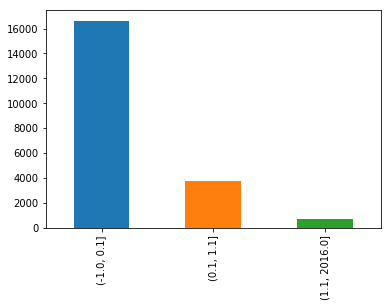

In [209]:
#binning to create columns for renovated = y, renovated = n, and renovated = N/A
bins_yr_renovated = [-1, .1, 1.1, 2016]
bins_yr_renovated = pd.cut(df['yr_renovated'], bins_yr_renovated)
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()
bins_yr_renovated.value_counts().plot(kind='bar')

In [210]:
df["yr_renovated"]=bins_yr_renovated

In [211]:
df.info() #All nulls removed.  Will drop the null columns from yr_renovated and waterfront after one hot encoding.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null category
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null object
yr_built         21082 non-null int64
yr_renovated     21082 non-null category
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(2), float64(6), int64(10), object(1)
memory usage: 2.9+ MB


In [212]:
df.view = df.view.astype('int64')

In [213]:
df.floors = df.floors.astype('int64')

In [214]:
#What else is categorical, changing datatype to category for scatterplot display.
df.floors = df.floors.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.floors = df.floors.astype('category')
df.sqft_basement = df.sqft_basement.astype('float64')

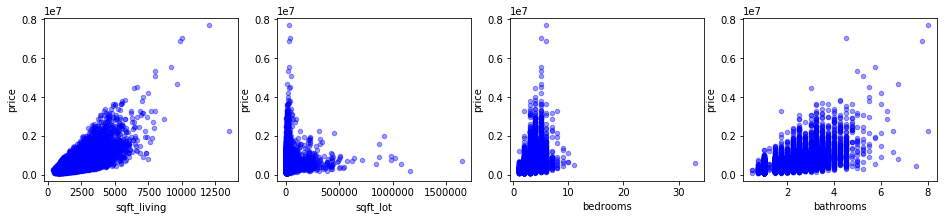

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Sqft_living shows a high degree of linearity with price.  Sqft_lot is heavily skewed toward 0, but is numerical.  Bedrooms and bathrooms are categorical and need to be binned.

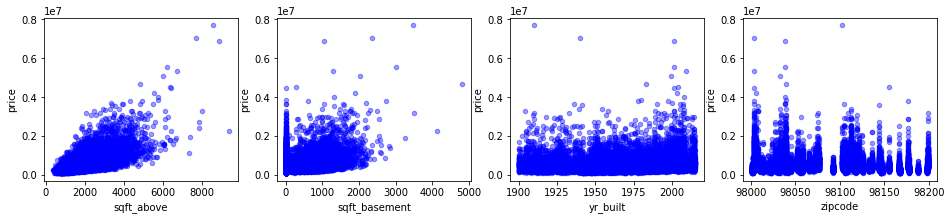

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_above', 'sqft_basement', 'yr_built', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Sqft_above is linear with price as well.  Sqft_basement is not linear, but numerical.  Yr_built and zipcode are categorical, need to be binned.

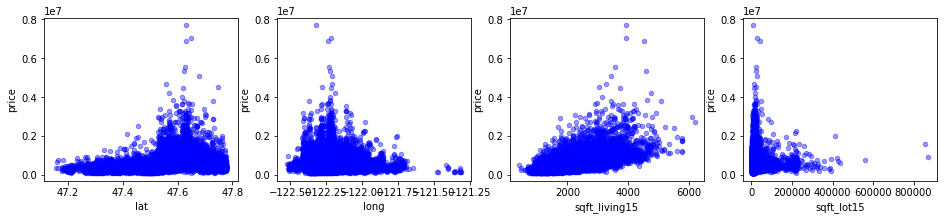

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Lat and long do not show linearity, need to look at histogram to determine if it needs normalization.  Sqft_living15 is linear with price.  Sqft_lot15 is heavily skewed toward 0.

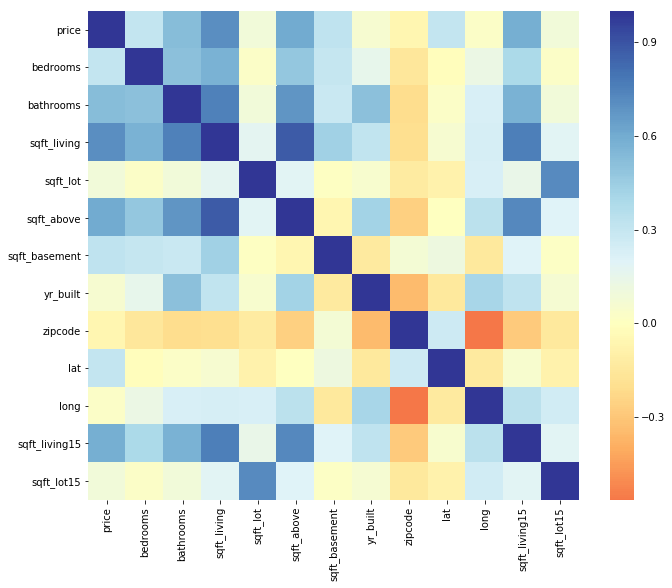

In [126]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), center=0, cmap='RdYlBu',);

In [127]:
abs(df.corr()) >0.75 #Positive correlation between sqft living and above columns.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,False,False,False


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null category
waterfront       21082 non-null category
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null category
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: category(6), float64(5), int64(8)
memory usage: 2.4 MB


In [216]:
#normalizing the numerical data.
df.bedrooms = (df.bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()
df.sqft_living = (df.sqft_living - df.sqft_living.mean()) / df.sqft_living.std()
df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
df.sqft_above = (df.sqft_above - df.sqft_above.mean()) / df.sqft_above.std()
df.sqft_basement = (df.sqft_basement - df.sqft_basement.mean()) / df.sqft_basement.std()
df.yr_built = (df.yr_built - df.yr_built.mean()) / df.yr_built.std()
df.zipcode = (df.zipcode - df.zipcode.mean()) / df.zipcode.std()
df.lat = (df.lat - df.lat.mean()) / df.lat.std()
df.long = (df.long - df.long.mean()) / df.long.std()
df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()
df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null category
waterfront       21082 non-null category
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null float64
sqft_basement    21082 non-null float64
yr_built         21082 non-null float64
yr_renovated     21082 non-null category
zipcode          21082 non-null float64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: category(6), float64(13)
memory usage: 2.4 MB


In [218]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,-0.402600,-1.452748,-0.980938,-0.228973,1,"(1.1, 2.1]",0,3,7,-0.735179,-0.659174,-0.546440,"(-1.0, 0.1]",1.870791,-0.354849,-0.306933,-0.943655,-0.260878
1,538000.0,-0.402600,0.174556,0.533460,-0.190307,2,"(-1.0, 0.9]",0,3,7,0.459940,0.245788,-0.682852,"(1.1, 2016.0]",0.880670,1.159208,-0.747879,-0.433112,-0.187615
2,180000.0,-1.483686,-1.452748,-1.427631,-0.123322,1,"(-1.0, 0.9]",0,3,6,-1.230128,-0.659174,-1.296702,"(0.1, 1.1]",-0.931440,1.281170,-0.136245,1.069344,-0.172034
3,604000.0,0.678486,1.150938,-0.131132,-0.244760,1,"(-1.0, 0.9]",0,5,7,-0.892114,1.399613,-0.205413,"(-1.0, 0.1]",1.086167,-0.285569,-1.274170,-0.914481,-0.284820
4,510000.0,-0.402600,-0.150905,-0.436190,-0.169954,1,"(-1.0, 0.9]",0,3,8,-0.131584,-0.659174,0.544849,"(-1.0, 0.1]",-0.072089,0.407231,1.200818,-0.272656,-0.192624


In [219]:
df = pd.get_dummies(df)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 43 columns):
price                         21082 non-null float64
bedrooms                      21082 non-null float64
bathrooms                     21082 non-null float64
sqft_living                   21082 non-null float64
sqft_lot                      21082 non-null float64
sqft_above                    21082 non-null float64
sqft_basement                 21082 non-null float64
yr_built                      21082 non-null float64
zipcode                       21082 non-null float64
lat                           21082 non-null float64
long                          21082 non-null float64
sqft_living15                 21082 non-null float64
sqft_lot15                    21082 non-null float64
floors_1                      21082 non-null uint8
floors_2                      21082 non-null uint8
floors_3                      21082 non-null uint8
waterfront_(-1.0, 0.9]        21082 non-null uint

In [221]:
df.rename(columns={'waterfront_(-1.0, 0.9]': 'waterfront_no', 'waterfront_(0.9, 1.1]':'waterfront_yes', 'waterfront_(1.1, 2.1]':'waterfront_na', 'yr_renovated_(-1.0, 0.1]':'renovated_no', 'yr_renovated_(0.1, 1.1]':'renovated_na', 'yr_renovated_(1.1, 2016.0]':'renovated_yes'}, inplace=True)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 43 columns):
price             21082 non-null float64
bedrooms          21082 non-null float64
bathrooms         21082 non-null float64
sqft_living       21082 non-null float64
sqft_lot          21082 non-null float64
sqft_above        21082 non-null float64
sqft_basement     21082 non-null float64
yr_built          21082 non-null float64
zipcode           21082 non-null float64
lat               21082 non-null float64
long              21082 non-null float64
sqft_living15     21082 non-null float64
sqft_lot15        21082 non-null float64
floors_1          21082 non-null uint8
floors_2          21082 non-null uint8
floors_3          21082 non-null uint8
waterfront_no     21082 non-null uint8
waterfront_yes    21082 non-null uint8
waterfront_na     21082 non-null uint8
view_0            21082 non-null uint8
view_1            21082 non-null uint8
view_2            21082 non-null uint8
view_3 

In [223]:
df = df.drop(['waterfront_na', 'renovated_na'], axis=1)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 41 columns):
price             21082 non-null float64
bedrooms          21082 non-null float64
bathrooms         21082 non-null float64
sqft_living       21082 non-null float64
sqft_lot          21082 non-null float64
sqft_above        21082 non-null float64
sqft_basement     21082 non-null float64
yr_built          21082 non-null float64
zipcode           21082 non-null float64
lat               21082 non-null float64
long              21082 non-null float64
sqft_living15     21082 non-null float64
sqft_lot15        21082 non-null float64
floors_1          21082 non-null uint8
floors_2          21082 non-null uint8
floors_3          21082 non-null uint8
waterfront_no     21082 non-null uint8
waterfront_yes    21082 non-null uint8
view_0            21082 non-null uint8
view_1            21082 non-null uint8
view_2            21082 non-null uint8
view_3            21082 non-null uint8
view_4 

Data scrubbed, normalized, and one hot encoded.

In [225]:
df.to_csv('student_scrub.csv')

## Exploring

In [138]:
for cat_names in df.iloc[:,13:].columns:
         df[cat_names] = df[cat_names].astype('category')

In [139]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,21082.000000,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04,2.108200e+04
mean,5.402469e+05,-7.414828e-17,-3.019857e-16,1.941337e-16,2.696301e-18,0.000000,3.505191e-17,-1.013809e-15,7.719577e-14,-2.467503e-14,9.732838e-14,-5.931862e-17,5.392602e-18
std,3.667323e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.564772e+00,-2.103670e+00,-1.863429e+00,-3.535680e-01,-1.713004,-6.591737e-01,-2.422093e+00,-1.435842e+00,-2.918930e+00,-2.170286e+00,-2.316287e+00,-4.450113e-01
25%,3.220000e+05,-4.025997e-01,-4.763658e-01,-7.085640e-01,-2.437883e-01,-0.711035,-6.591737e-01,-6.487487e-01,-8.380323e-01,-6.426134e-01,-8.118877e-01,-7.248510e-01,-2.811365e-01
50%,4.500000e+05,-4.025997e-01,1.745558e-01,-1.856063e-01,-1.811264e-01,-0.276447,-6.591737e-01,1.356153e-01,-2.402229e-01,8.536787e-02,-1.149085e-01,-2.143077e-01,-1.880937e-01
75%,6.450000e+05,6.784864e-01,5.000166e-01,5.116705e-01,-1.063755e-01,0.508227,6.077721e-01,8.858765e-01,7.312173e-01,8.503345e-01,6.318550e-01,5.442137e-01,-9.738058e-02
max,7.700000e+06,3.202998e+01,7.660154e+00,1.248522e+01,3.974125e+01,9.200002,1.024561e+01,1.499727e+00,2.263104e+00,1.567671e+00,6.392602e+00,6.160190e+00,3.162085e+01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299CB661748>,
      dtype=object)

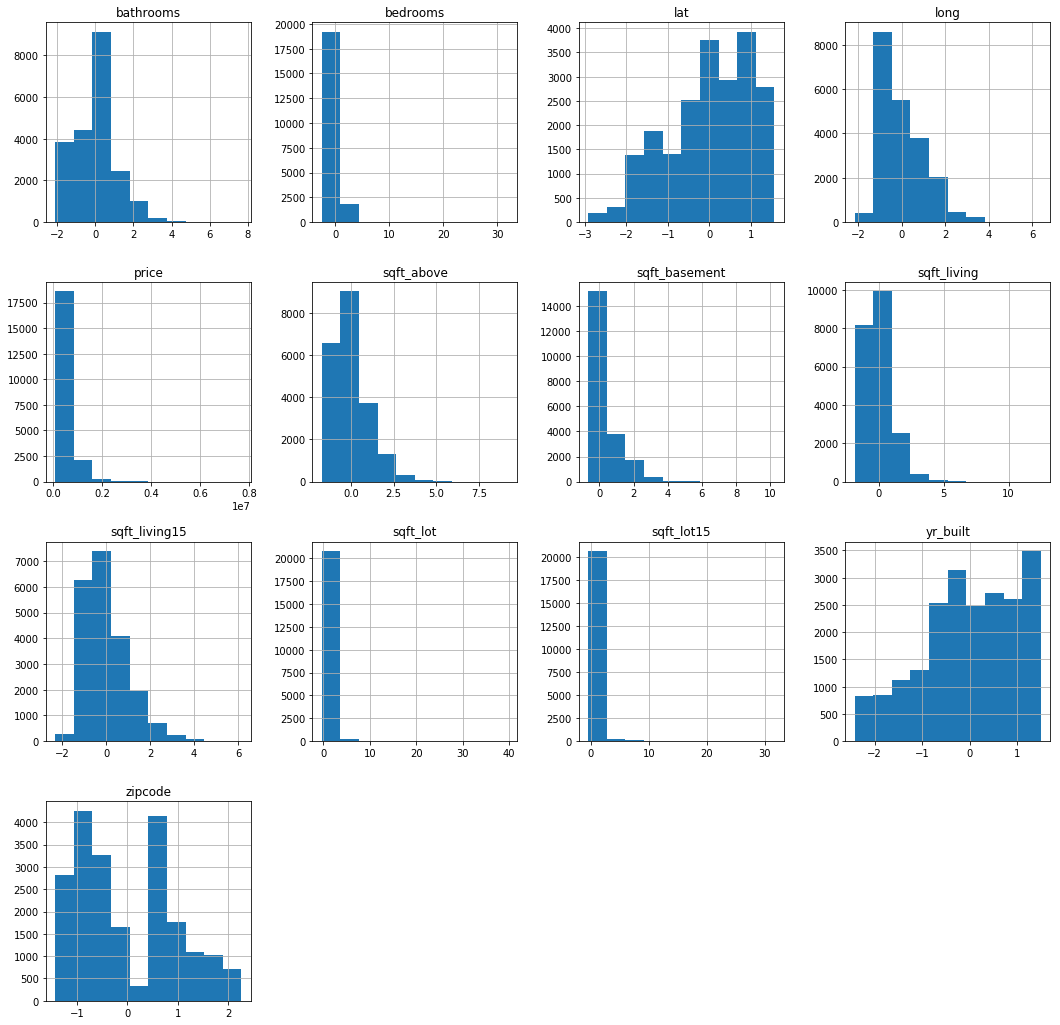

In [140]:
df.hist(figsize=(18,18))

Bedrooms, price, sqft_lot, and sqft_lot15 look to have outliers.  Most histograms are skewed.  Zipcode looks like it has two modes.  

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


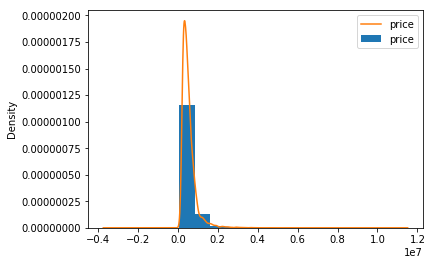

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


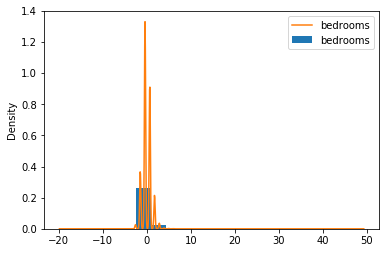

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


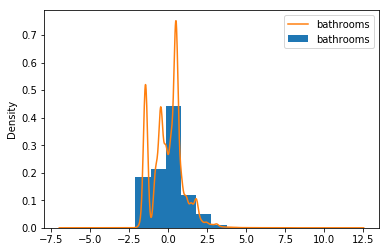

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


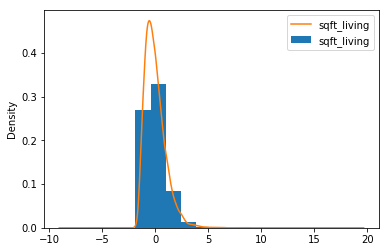

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


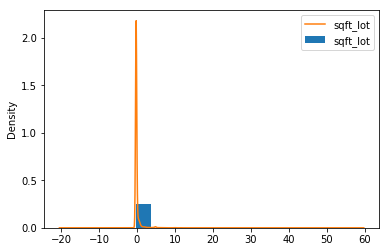

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


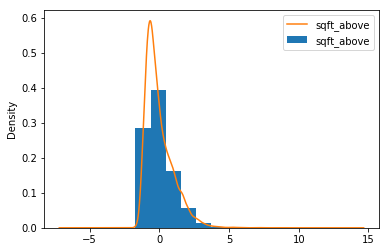

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


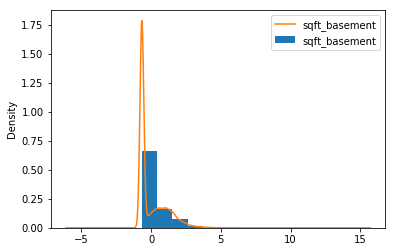

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


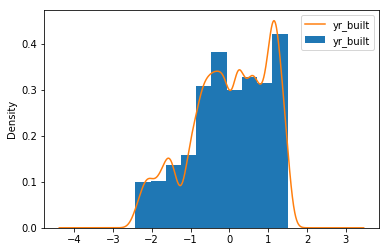

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


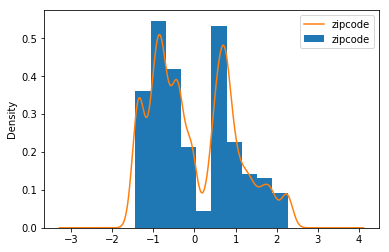

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


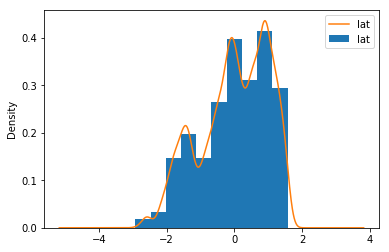

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


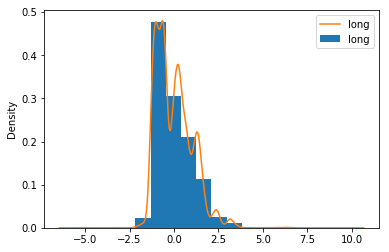

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


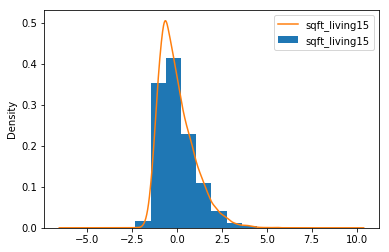

C:\Users\josep\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


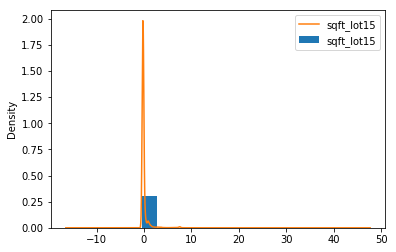

In [55]:
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(normed=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

## Modeling

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 44 columns):
price             21082 non-null float64
bedrooms          21082 non-null float64
bathrooms         21082 non-null float64
sqft_living       21082 non-null float64
sqft_lot          21082 non-null float64
sqft_above        21082 non-null float64
sqft_basement     21082 non-null float64
yr_built          21082 non-null float64
zipcode           21082 non-null float64
lat               21082 non-null float64
long              21082 non-null float64
sqft_living15     21082 non-null float64
sqft_lot15        21082 non-null float64
floors_1.0        21082 non-null category
floors_1.5        21082 non-null category
floors_2.0        21082 non-null category
floors_2.5        21082 non-null category
floors_3.0        21082 non-null category
floors_3.5        21082 non-null category
waterfront_no     21082 non-null category
waterfront_yes    21082 non-null category
view_0.0          2108

In [142]:
import statsmodels.formula.api as smf

In [143]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King Cty: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King Cty: price~bedrooms
------------------------------
['bedrooms', 0.09514380839134184, 540246.8904752871, 113120.01945780392, 0.0]
King Cty: price~bathrooms
------------------------------
['bathrooms', 0.27565534211705833, 540246.8904752871, 192545.07397680086, 0.0]
King Cty: price~sqft_living
------------------------------
['sqft_living', 0.49280911924669435, 540246.8904752871, 257447.43745887777, 0.0]
King Cty: price~sqft_lot
------------------------------
['sqft_lot', 0.007814472143692908, 540246.8904752871, 32418.9563158288, 7.585998491378811e-38]
King Cty: price~sqft_above
------------------------------
['sqft_above', 0.36660773487327236, 540246.8904752871, 222049.6113491868, 0.0]
King Cty: price~sqft_basement
------------------------------
['sqft_basement', 0.10434033600616388, 540246.8904752871, 118460.9799624354, 0.0]
King Cty: price~yr_built
------------------------------
['yr_built', 0.0030084646048749164, 540246.8904752871, 20115.075114976946, 1.59351169919941e-15]
King C

None of the numerical predictors are disqualified by p-value.  Dropping all columns that do not have a >0.3 r_squared value.

I am left with three predictors.  Two, sqft_living and sqft_above, are basically the same thing.  Need to log transform the data and see if that helps.

In [284]:
df_log = pd.read_csv("kc_house_data.csv")

In [285]:
df_log = df_log.drop(['id'], axis=1) #ID is not useful to us it is an index
df_log = df_log.drop(['date'], axis=1) # not using datetime trending in this model
df_log.dropna(subset=['view'], inplace=True) #remove rows containing nulls in the view column
df_log = df_log[df_log.sqft_basement != '?'] #remove '?' from the sqft_basement column


In [286]:
df_log.floors = df_log.floors.astype('category')
df_log.view = df_log.view.astype('category')
df_log.condition = df_log.condition.astype('category')
df_log.grade = df_log.grade.astype('category')
df_log.floors = df_log.floors.astype('category')
df_log.sqft_basement = df_log.sqft_basement.astype('float64')

In [287]:
df_log.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,18749.000000,21082.000000,21082.000000,21082.000000,17340.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,0.007520,1789.000000,291.359975,1971.023337,83.111419,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.086396,828.369355,442.007858,29.323120,398.756281,53.528769,0.138568,0.140607,685.544250,27148.781580
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,0.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,0.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,0.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [288]:
df_log.bedrooms = np.log(df_log["bedrooms"])
df_log.bathrooms = np.log(df_log["bathrooms"])
df_log.sqft_living = np.log(df_log["sqft_living"])
df_log.sqft_lot = np.log(df_log["sqft_lot"])
df_log.sqft_above = np.log(df_log["sqft_above"])
df_log.sqft_basement = df_log.drop(["sqft_basement"], axis=1)
df_log.yr_built = np.log(df_log["yr_built"])
df_log.zipcode = np.log(df_log["zipcode"])
df_log.lat = np.log(df_log["lat"])
df_log.long = df_log.drop(["long"], axis=1)
df_log.sqft_living15 = np.log(df_log["sqft_living15"])
df_log.sqft_lot15 = np.log(df_log["sqft_lot15"])
df_log.price = np.log(df_log["price"])

In [289]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null category
waterfront       18749 non-null float64
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null float64
sqft_basement    21082 non-null object
yr_built         21082 non-null float64
yr_renovated     17340 non-null float64
zipcode          21082 non-null float64
lat              21082 non-null float64
long             21082 non-null object
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: category(4), float64(13), object(2)
memory usage: 2.7+ MB


In [290]:
df_log.waterfront = df_log.drop(["waterfront"], axis=1)
df_log.yr_renovated = df_log.drop(["yr_renovated"], axis=1)

In [291]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 19 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null category
waterfront       21082 non-null object
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null float64
sqft_basement    21082 non-null object
yr_built         21082 non-null float64
yr_renovated     21082 non-null object
zipcode          21082 non-null float64
lat              21082 non-null float64
long             21082 non-null object
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: category(4), float64(11), object(4)
memory usage: 2.7+ MB


In [292]:
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309982,1.098612,0.000000,7.073270,8.639411,1.0,12.31,0.0,3,7,7.073270,221900,7.578145,12.31,11.494537,3.860965,221900,7.200425,8.639411
1,13.195614,1.098612,0.810930,7.851661,8.887653,2.0,13.1956,0.0,3,7,7.682482,538000,7.576097,13.1956,11.493997,3.865372,538000,7.432484,8.941022
2,12.100712,0.693147,0.000000,6.646391,9.210340,1.0,12.1007,0.0,3,6,6.646391,180000,7.566828,12.1007,11.493008,3.865726,180000,7.908387,8.994917
3,13.311329,1.386294,1.098612,7.580700,8.517193,1.0,13.3113,0.0,5,7,6.956545,604000,7.583248,13.3113,11.494110,3.861168,604000,7.215240,8.517193
4,13.142166,1.098612,0.693147,7.426549,8.997147,1.0,13.1422,0.0,3,8,7.426549,510000,7.594381,13.1422,11.493478,3.863186,510000,7.495542,8.923058


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299D16AC278>,
      dtype=object)

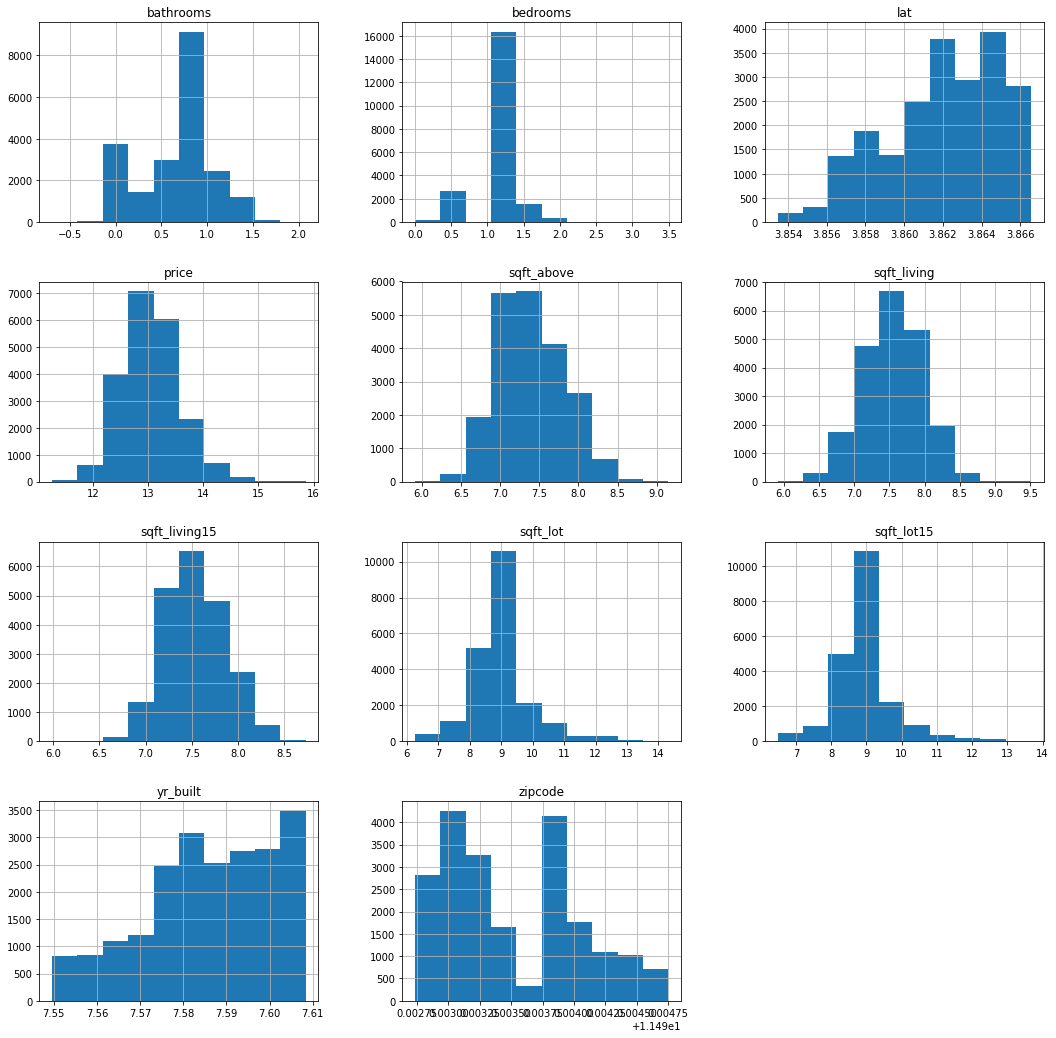

In [293]:
df_log.hist(figsize=(18,18))

In [294]:
col_names = df_log.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King Cty: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log).fit()
    X_new = pd.DataFrame({val: [df_log[val].min(), df_log[val].max()]});
    preds10 = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King Cty: price~bedrooms
------------------------------
['bedrooms', 0.11690843421819974, 12.298372771661583, 0.636695731004518, 0.0]
King Cty: price~bathrooms
------------------------------
['bathrooms', 0.26999400394509154, 12.575420361580466, 0.6975426264753711, 0.0]
King Cty: price~sqft_living
------------------------------
['sqft_living', 0.45487390817074236, 6.725492042621472, 0.8373565737137357, 0.0]
King Cty: price~sqft_lot
------------------------------
['sqft_lot', 0.01912643850674456, 12.32211855226208, 0.08076135917588545, 1.5829053476127593e-90]
King Cty: price~sqft_above
------------------------------
['sqft_above', 0.34318242539406985, 7.707525685549353, 0.7221650180792579, 0.0]
King Cty: price~yr_built
------------------------------
['yr_built', 0.006334731497952939, -8.23672528771101, 2.8057460377117778, 5.581153245811331e-31]
King Cty: price~zipcode
------------------------------
['zipcode', 0.001481818864053852, 439.81742918259226, -37.13129940565579, 2.2577886440726

In [295]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.116908,12.2984,0.636696,0
2,bathrooms,0.269994,12.5754,0.697543,0
3,sqft_living,0.454874,6.72549,0.837357,0
4,sqft_lot,0.0191264,12.3221,0.0807614,1.58291e-90
5,sqft_above,0.343182,7.70753,0.722165,0
6,yr_built,0.00633473,-8.23673,2.80575,5.58115e-31
7,zipcode,0.00148182,439.817,-37.1313,2.25779e-08
8,lat,0.202354,-300.604,81.215,0
9,sqft_living15,0.369164,5.68335,0.976819,0


Log transformed data looks very similar to Z score normalized data.  Keeping Z score data.  Next step is to model categorical predictors.

In [248]:
df_cat = df
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 41 columns):
price             21082 non-null float64
bedrooms          21082 non-null float64
bathrooms         21082 non-null float64
sqft_living       21082 non-null float64
sqft_lot          21082 non-null float64
sqft_above        21082 non-null float64
sqft_basement     21082 non-null float64
yr_built          21082 non-null float64
zipcode           21082 non-null float64
lat               21082 non-null float64
long              21082 non-null float64
sqft_living15     21082 non-null float64
sqft_lot15        21082 non-null float64
floors_1          21082 non-null uint8
floors_2          21082 non-null uint8
floors_3          21082 non-null uint8
waterfront_no     21082 non-null uint8
waterfront_yes    21082 non-null uint8
view_0            21082 non-null uint8
view_1            21082 non-null uint8
view_2            21082 non-null uint8
view_3            21082 non-null uint8
view_4 

In [249]:
df_cat.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'floors_1', 'floors_2', 'floors_3',
       'waterfront_no', 'waterfront_yes', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'renovated_no', 'renovated_yes'],
      dtype='object')

In [250]:
df_cat = df_cat.drop(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], axis=1)

In [254]:
df_cat.columns

Index(['price', 'floors_1', 'floors_2', 'floors_3', 'waterfront_no',
       'waterfront_yes', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'renovated_no', 'renovated_yes'],
      dtype='object')

In [252]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [253]:
predictors = df_cat.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1328.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:26:39   Log-Likelihood:            -2.9031e+05
No. Observations:               21082   AIC:                         5.807e+05
Df Residuals:                   21057   BIC:                         5.809e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.685e+17   9.71e+16     -1.734      0.083   -3.59e+17    2.19e+16
floors_1       -2.888e+17   1.66e+17     -1.734      0.083   -6.15e+17    3.76e+16
floors_2       -2.888e+17   1.66e+17     -1.734      0.083   -6.15e+17    3.76e+16
floors_3       -2.888e+17   1.66e+17     -1.734      0.083   -6.15e+17    3.76e+16
waterfront_no   2301.4213   5085.612      0.453      0.651   -7666.769    1.23e+04
waterfront_yes  5.263e+05   2.44e+04     21.597      0.000    4.79e+05    5.74e+05
view_0          2.364e+17   1.36e+17      1.734      0.083   -3.08e+16    5.04e+17
view_1          2.364e+17   1.36e+17      1.734      0.083   -3.08e+16    5.04e+17
view_2          2.364e+17   1.36e+17      1.734      0.083   -3.08e+16    5.04e+17
view_3          2.364e+17   1.36e+17      1.734      0.083   -3.08e+16    5.04e+17
view_4          2.364e+17   1.36e+17      1.734      0.083   -3.08e+16    5.04e+17
condition_1     2.131e+17   1.23e+17      1.734      0.083   -2.77e+16    4.54e+17
condition_2     2.131e+17   1.23e+17      1.734      0.083   -2.77e+16    4.54e+17
condition_3     2.131e+17   1.23e+17      1.734      0.083   -2.77e+16    4.54e+17
condition_4     2.131e+17   1.23e+17      1.734      0.083   -2.77e+16    4.54e+17
condition_5     2.131e+17   1.23e+17      1.734      0.083   -2.77e+16    4.54e+17
grade_3         7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_4         7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_5         7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_6         7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_7         7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_8         7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_9         7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_10        7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_11        7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_12        7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
grade_13        7.676e+15   4.43e+15      1.734      0.083   -9.98e+14    1.64e+16
renovated_no   -8449.6360   4190.920     -2.016      0.044   -1.67e+04    -235.111
renovated_yes   1.743e+05   9474.645     18.391      0.000    1.56e+05    1.93e+05
==============================================================================
Omnibus:                    13406.627   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           583764.916
Skew:                           2.458   Prob(JB):                         0.00
Kurtosis:                      28.306   Cond. No.                     5.94e+15
================================

Only predictors that have a p-value of <0.05 are renovated_yes and waterfront_yes.  Dropping all columns and will run analysis again.

In [232]:
df_cat = df_cat.drop(['floors_1', 'floors_2', 'floors_3', 'waterfront_no',
       'view_0', 'view_1', 'view_2', 'view_3', 'view_4',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'renovated_no'], axis=1)

In [233]:
df_cat.columns

Index(['price', 'waterfront_yes', 'renovated_yes'], dtype='object')

In [234]:
predictors1 = df_cat.drop('price', axis=1)
pred_sum = "+".join(predictors1.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     887.5
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:55:15   Log-Likelihood:            -2.9917e+05
No. Observations:               21082   AIC:                         5.984e+05
Df Residuals:                   21079   BIC:                         5.984e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.258e+05   2474.102    212.524      0.000    5.21e+05    5.31e+05
waterfront_yes  1.142e+06   2.98e+04     38.270      0.000    1.08e+06     1.2e+06
renovated_yes   1.987e+05   1.34e+04     14.858      0.000    1.72e+05    2.25e+05
==============================================================================
Omnibus:                    17118.454   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           858530.416
Skew:                           3.553   Prob(JB):                         0.00
Kurtosis:                      33.444   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
df_cat1 = df_cat

In [256]:
df_cat1 = df_cat1.drop(['price'],axis=1)

In [257]:
df_cat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 28 columns):
floors_1          21082 non-null uint8
floors_2          21082 non-null uint8
floors_3          21082 non-null uint8
waterfront_no     21082 non-null uint8
waterfront_yes    21082 non-null uint8
view_0            21082 non-null uint8
view_1            21082 non-null uint8
view_2            21082 non-null uint8
view_3            21082 non-null uint8
view_4            21082 non-null uint8
condition_1       21082 non-null uint8
condition_2       21082 non-null uint8
condition_3       21082 non-null uint8
condition_4       21082 non-null uint8
condition_5       21082 non-null uint8
grade_3           21082 non-null uint8
grade_4           21082 non-null uint8
grade_5           21082 non-null uint8
grade_6           21082 non-null uint8
grade_7           21082 non-null uint8
grade_8           21082 non-null uint8
grade_9           21082 non-null uint8
grade_10          21082 non-null 

In [258]:
df_1 = df

In [259]:
df_1 = df_1.drop(['bedrooms', 'bathrooms', 'sqft_lot',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_lot15', 'floors_1', 'floors_2', 'floors_3',
       'waterfront_no', 'waterfront_yes', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'renovated_no', 'renovated_yes'], axis=1)

In [260]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 4 columns):
price            21082 non-null float64
sqft_living      21082 non-null float64
sqft_above       21082 non-null float64
sqft_living15    21082 non-null float64
dtypes: float64(4)
memory usage: 1.4 MB


In [261]:
df_final = pd.concat([df_1, df_cat1],axis=1)

In [262]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 32 columns):
price             21082 non-null float64
sqft_living       21082 non-null float64
sqft_above        21082 non-null float64
sqft_living15     21082 non-null float64
floors_1          21082 non-null uint8
floors_2          21082 non-null uint8
floors_3          21082 non-null uint8
waterfront_no     21082 non-null uint8
waterfront_yes    21082 non-null uint8
view_0            21082 non-null uint8
view_1            21082 non-null uint8
view_2            21082 non-null uint8
view_3            21082 non-null uint8
view_4            21082 non-null uint8
condition_1       21082 non-null uint8
condition_2       21082 non-null uint8
condition_3       21082 non-null uint8
condition_4       21082 non-null uint8
condition_5       21082 non-null uint8
grade_3           21082 non-null uint8
grade_4           21082 non-null uint8
grade_5           21082 non-null uint8
grade_6           21082 n

In [267]:
df_final1 = df_final

In [268]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 32 columns):
price             21082 non-null float64
sqft_living       21082 non-null float64
sqft_above        21082 non-null float64
sqft_living15     21082 non-null float64
floors_1          21082 non-null uint8
floors_2          21082 non-null uint8
floors_3          21082 non-null uint8
waterfront_no     21082 non-null uint8
waterfront_yes    21082 non-null uint8
view_0            21082 non-null uint8
view_1            21082 non-null uint8
view_2            21082 non-null uint8
view_3            21082 non-null uint8
view_4            21082 non-null uint8
condition_1       21082 non-null uint8
condition_2       21082 non-null uint8
condition_3       21082 non-null uint8
condition_4       21082 non-null uint8
condition_5       21082 non-null uint8
grade_3           21082 non-null uint8
grade_4           21082 non-null uint8
grade_5           21082 non-null uint8
grade_6           21082 n

In [269]:
df_final1 = df_final1.drop(['floors_1', 'waterfront_no', 'view_0', 'condition_1', 'grade_3', 'renovated_no'], axis=1)

In [270]:
predictors4 = df_final1.drop('price', axis=1)
pred_sum = "+".join(predictors4.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_final1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1567.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:41:11   Log-Likelihood:            -2.8895e+05
No. Observations:               21082   AIC:                         5.779e+05
Df Residuals:                   21056   BIC:                         5.781e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.691e+05   2.21e+05      1.670      0.095    -6.4e+04    8.02e+05
sqft_living     1.453e+05   3664.840     39.652      0.000    1.38e+05    1.53e+05
sqft_above     -3.247e+04   3847.041     -8.441      0.000      -4e+04   -2.49e+04
sqft_living15   1.476e+04   2525.229      5.845      0.000    9809.286    1.97e+04
floors_2       -2.094e+04   4277.126     -4.895      0.000   -2.93e+04   -1.26e+04
floors_3         7.58e+04   9708.232      7.808      0.000    5.68e+04    9.48e+04
waterfront_yes  5.214e+05   2.23e+04     23.359      0.000    4.78e+05    5.65e+05
view_1          1.391e+05   1.22e+04     11.369      0.000    1.15e+05    1.63e+05
view_2          8.137e+04   7465.089     10.900      0.000    6.67e+04     9.6e+04
view_3          1.311e+05   1.02e+04     12.838      0.000    1.11e+05    1.51e+05
view_4           2.82e+05   1.55e+04     18.242      0.000    2.52e+05    3.12e+05
condition_2    -2.452e+04   4.45e+04     -0.551      0.581   -1.12e+05    6.27e+04
condition_3    -2.204e+04   4.14e+04     -0.532      0.595   -1.03e+05    5.91e+04
condition_4     2.449e+04   4.14e+04      0.591      0.554   -5.67e+04    1.06e+05
condition_5     1.041e+05   4.17e+04      2.499      0.012    2.25e+04    1.86e+05
grade_4         1.667e+04   2.21e+05      0.075      0.940   -4.17e+05     4.5e+05
grade_5         2137.6206   2.17e+05      0.010      0.992   -4.24e+05    4.28e+05
grade_6         3.614e+04   2.17e+05      0.166      0.868   -3.89e+05    4.62e+05
grade_7         7.475e+04   2.17e+05      0.344      0.731   -3.51e+05       5e+05
grade_8         1.458e+05   2.17e+05      0.672      0.502    -2.8e+05    5.71e+05
grade_9          2.84e+05   2.17e+05      1.308      0.191   -1.42e+05     7.1e+05
grade_10        4.745e+05   2.17e+05      2.184      0.029    4.86e+04       9e+05
grade_11        7.465e+05   2.18e+05      3.431      0.001     3.2e+05    1.17e+06
grade_12        1.201e+06   2.19e+05      5.492      0.000    7.73e+05    1.63e+06
grade_13        2.514e+06   2.26e+05     11.123      0.000    2.07e+06    2.96e+06
renovated_yes   1.594e+05   8316.625     19.162      0.000    1.43e+05    1.76e+05
==============================================================================
Omnibus:                    11861.768   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           376878.803
Skew:                           2.138   Prob(JB):                         0.00
Kurtosis:                      23.267   Cond. No.                         799.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
df_final1 = df_final1.drop(['condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13'], axis=1)

In [273]:
predictors5 = df_final1.drop('price', axis=1)
pred_sum = "+".join(predictors5.columns)
formula = 'price' + "~" + pred_sum
model = ols(formula= formula, data=df_final1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2504.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:49:21   Log-Likelihood:            -2.9121e+05
No. Observations:               21082   AIC:                         5.824e+05
Df Residuals:                   21070   BIC:                         5.825e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.262e+05   2543.471    206.894      0.000    5.21e+05    5.31e+05
sqft_living     2.008e+05   3897.478     51.523      0.000    1.93e+05    2.08e+05
sqft_above      1.172e+04   4159.160      2.817      0.005    3563.443    1.99e+04
sqft_living15   4.427e+04   2657.424     16.658      0.000    3.91e+04    4.95e+04
floors_2       -3.722e+04   4427.260     -8.408      0.000   -4.59e+04   -2.85e+04
floors_3        1.214e+05   1.03e+04     11.806      0.000    1.01e+05    1.42e+05
waterfront_yes  5.075e+05   2.48e+04     20.457      0.000    4.59e+05    5.56e+05
view_1          1.488e+05   1.36e+04     10.935      0.000    1.22e+05    1.75e+05
view_2          1.101e+05   8288.929     13.280      0.000    9.38e+04    1.26e+05
view_3          1.748e+05   1.13e+04     15.428      0.000    1.53e+05    1.97e+05
view_4           3.87e+05   1.71e+04     22.621      0.000    3.53e+05     4.2e+05
renovated_yes    1.36e+05   9220.184     14.746      0.000    1.18e+05    1.54e+05
==============================================================================
Omnibus:                    13673.511   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566975.273
Skew:                           2.550   Prob(JB):                         0.00
Kurtosis:                      27.889   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Validation

In [274]:
y = df_final1[["price"]]
X = df_final1.drop(["price"], axis=1)
X.head()

,sqft_living,sqft_above,sqft_living15,floors_2,floors_3,waterfront_yes,view_1,view_2,view_3,view_4,renovated_yes
0,-0.980938,-0.735179,-0.943655,0,0,0,0,0,0,0,0
1,0.533460,0.459940,-0.433112,1,0,0,0,0,0,0,1
2,-1.427631,-1.230128,1.069344,0,0,0,0,0,0,0,0
3,-0.131132,-0.892114,-0.914481,0,0,0,0,0,0,0,0
4,-0.436190,-0.131584,-0.272656,0,0,0,0,0,0,0,0


In [275]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [276]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

price    0.547861
dtype: float64
price    0.547625
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64
price    0.566604
dtype: float64
price    0.566378
dtype: float64


In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

price    5.998338e+10
dtype: float64
price    6.422127e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64
price    5.749219e+10
dtype: float64
price    6.157518e+10
dtype: float64


In [283]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# select 85 best predictors

select_85 = RFE(linreg, n_features_to_select = 85)
select_85 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-5.56952957e+10, -6.71994451e+10, -5.21719626e+10, -7.04851038e+10,
       -5.28939645e+10, -5.34331728e+10, -5.30285076e+10, -5.70994552e+10,
       -5.94794719e+10, -6.62135041e+10])